In [144]:
import pandas as pd
from pandas import DataFrame, Series
import numpy as np
import matplotlib.pyplot as plt
import datetime
import random
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.preprocessing import StandardScaler
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import sklearn.metrics as skm
from sklearn.pipeline import Pipeline
from scipy import interp
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

# Make necessary imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Get data 

In [12]:
df=pd.read_csv('C://Users/Baris/Desktop/LEYLA_CAPSTONE/complaint_data.csv')



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356310 entries, 0 to 1356309
Data columns (total 18 columns):
Date received                   1356310 non-null object
Product                         1356310 non-null object
Sub-product                     1121144 non-null object
Issue                           1356309 non-null object
Sub-issue                       815886 non-null object
Consumer complaint narrative    419485 non-null object
Company public response         487979 non-null object
Company                         1356310 non-null object
State                           1334660 non-null object
ZIP code                        1234009 non-null object
Tags                            185303 non-null object
Consumer consent provided?      756690 non-null object
Submitted via                   1356310 non-null object
Date sent to company            1356310 non-null object
Company response to consumer    1356308 non-null object
Timely response?                1356310 non-null obj

In [ ]:
df.describe()

In [4]:
df.shape

(1356310, 18)

In [5]:
df['Company'].value_counts(dropna=False).shape #company count 

(5372,)

In [6]:
df['Sub-issue'].value_counts().shape #subisue count

(219,)

In [7]:
df['Issue'].value_counts() #issue count

Incorrect information on your report                                                158228
Loan modification,collection,foreclosure                                            112311
Incorrect information on credit report                                              102686
Loan servicing, payments, escrow account                                             77333
Cont'd attempts collect debt not owed                                                60684
Problem with a credit reporting company's investigation into an existing problem     59971
Attempts to collect debt not owed                                                    49084
Account opening, closing, or management                                              37961
Improper use of your report                                                          36790
Communication tactics                                                                36741
Disclosure verification of debt                                                      30798

In [8]:
df['Company public response'].value_counts(dropna=False) #public response count

NaN                                                                                                                        868331
Company has responded to the consumer and the CFPB and chooses not to provide a public response                            345926
Company believes it acted appropriately as authorized by contract or law                                                    64770
Company chooses not to provide a public response                                                                            52473
Company believes the complaint is the result of a misunderstanding                                                           6022
Company disputes the facts presented in the complaint                                                                        5486
Company believes complaint caused principally by actions of third party outside the control or direction of the company      4140
Company believes complaint is the result of an isolated error                             

In [9]:
df['Company response to consumer'].value_counts(dropna=False) #company response count

Closed with explanation            1051870
Closed with non-monetary relief     169875
Closed with monetary relief          77243
Closed without relief                17868
Closed                               17611
In progress                          10023
Untimely response                     6514
Closed with relief                    5304
NaN                                      2
Name: Company response to consumer, dtype: int64

In [10]:
df['Tags'].value_counts(dropna=False) #tags count

NaN                              1171007
Servicemember                      90464
Older American                     79898
Older American, Servicemember      14941
Name: Tags, dtype: int64

In [11]:
df['Date received'].max() #max date receive count

'12/31/2018'

In [12]:
df['Date received'].min() #min date receive count

'01/01/2012'

In [13]:
df['Submitted via'].value_counts(dropna=False) #submitted via count

Web            1006552
Referral        179305
Phone            80579
Postal mail      69794
Fax              19695
Email              385
Name: Submitted via, dtype: int64

In [242]:
df['Timely response?'].value_counts(dropna=False) #timely response count

Yes    1322966
No       33344
Name: Timely response?, dtype: int64

In [17]:
#create new feature company compaint counts
Company_Complaint_Counts = df['Company'].value_counts()
df['Company_Complaint_Counts'] = df['Company'].apply(lambda x: Company_Complaint_Counts[x])
company = pd.crosstab(df['Company'], df['Consumer disputed?'])
company.head() 

Consumer disputed?,No,Yes
Company,,
"(Former)Shapiro, Swertfeger & Hasty, LLP",4,0
"1 STOP MONEY CENTERS, LLC",1,0
1ST 2ND MORTGAGE CO. OF NJ INC,1,0
"1ST ALLIANCE LENDING, LLC",15,3
1ST PREFERENCE MORTGAGE CORP,1,1


# Create new variable dispute rate

In [19]:
company['Dispute_Rate'] = company.Yes / (company.Yes + company.No)
company['Company'] = company.index
company['Complaint_Counts'] = company['Company'].apply(lambda x: Company_Complaint_Counts[x])
company = company.sort_values('Complaint_Counts', ascending=False)
company 

Consumer disputed?,No,Yes,Dispute_Rate,Company,Complaint_Counts
Company,,,,,
"EQUIFAX, INC.",38311,10079,0.208287,"EQUIFAX, INC.",126859
Experian Information Solutions Inc.,40292,5330,0.116830,Experian Information Solutions Inc.,112756
"TRANSUNION INTERMEDIATE HOLDINGS, INC.",34368,5638,0.140929,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",107666
"BANK OF AMERICA, NATIONAL ASSOCIATION",51605,14387,0.218011,"BANK OF AMERICA, NATIONAL ASSOCIATION",84217
WELLS FARGO & COMPANY,41976,11717,0.218222,WELLS FARGO & COMPANY,73092
JPMORGAN CHASE & CO.,33107,9523,0.223387,JPMORGAN CHASE & CO.,62491
"CITIBANK, N.A.",28071,6697,0.192620,"CITIBANK, N.A.",50889
CAPITAL ONE FINANCIAL CORPORATION,16659,3655,0.179925,CAPITAL ONE FINANCIAL CORPORATION,36530
"Navient Solutions, LLC.",14919,3083,0.171259,"Navient Solutions, LLC.",30213


# Company complaint count versus dipute rate 

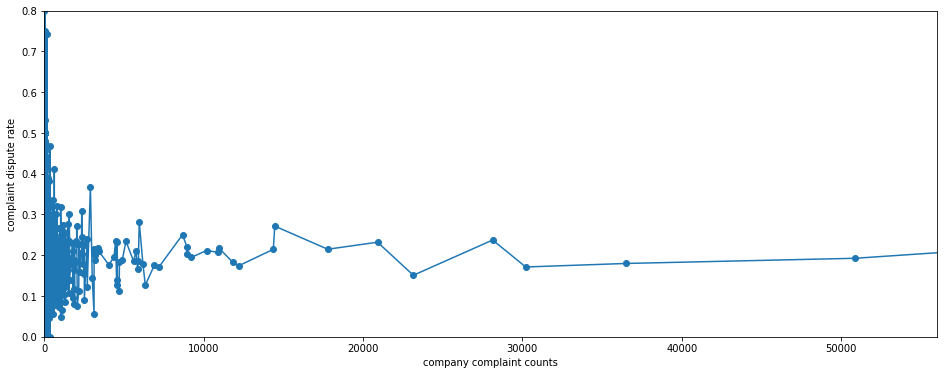

In [19]:
fig = plt.figure(figsize=(16,6))
plt.plot(company['complaint_counts'],company['dispute_rate'],marker='o')
plt.xlim([0.0, 56000])
plt.ylim([0.0, 0.8])
plt.xlabel('company complaint counts')
plt.ylabel('complaint dispute rate')
plt.title('')
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
plt.rcParams.update({'font.size': 18})

plt.show()
fig.savefig('disputerate_complaintcount.png')

# Consumer Dispute Versus Product Correlation

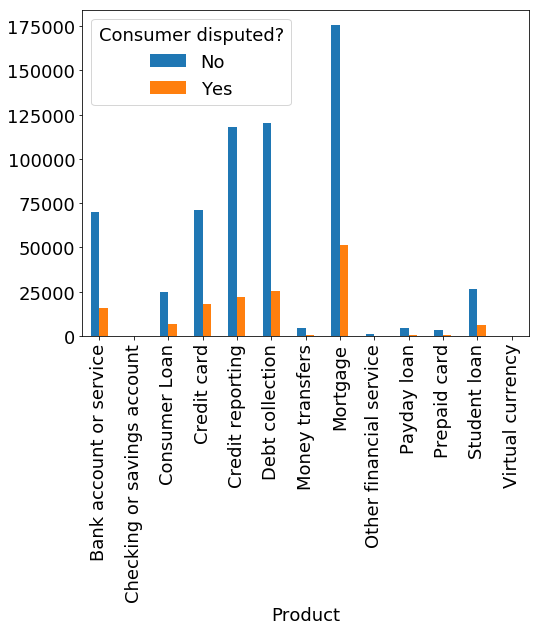

In [20]:
temp= pd.crosstab(df['Product'], df['Consumer disputed?'])
temp.plot(kind='bar',figsize=(8,6))## The disputed percentages are about same between 
###Consent and Consent Not "complaint narrative text".

In [22]:
# Company response to consumer vs Consumer disputed? Correlation

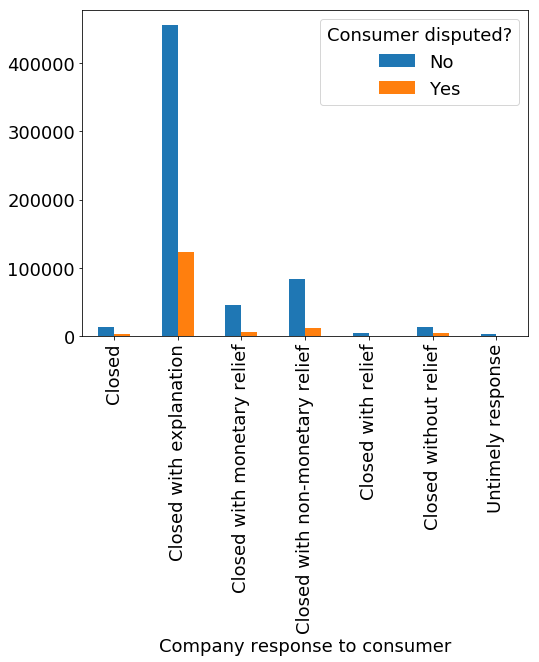

In [21]:
temp1= pd.crosstab(df['Company response to consumer'], df['Consumer disputed?'])
temp1.plot(kind='bar',figsize=(8,6)) ###Most cases are fall in closed with explaination
#there is correlation between colsed with relief and monetary relief. Customers gets closed with explanation more disputed to companies

# MISSING VALUES 

### Check NA's in the dataset

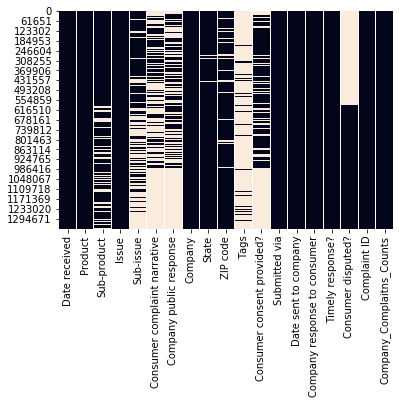

In [341]:
sns.heatmap(df.isnull(), cbar=False)

In [20]:
#Subproduct NA values replaced with 'Not provided'
df['Sub-product'].fillna('Not Provided',inplace=True)
df['Sub-issue'].fillna('Not Provided',inplace=True)

df['Consumer complaint narrative'].fillna('None or Not Provided',inplace=True)
df['Company public response'].fillna('Company chooses not to provide',inplace=True) 

###Issue NA values replaced with 'OTHER' 
df['Issue'].fillna('Other',inplace=True) 

###Tags NA values replaced with 'Unknown'
df['Tags'].fillna('Unknown',inplace=True) 

### Submitted via  NA values replaced with 'Other' 
df['Submitted via'].fillna('Other',inplace=True) 

### Consumer consent provided? d with 'Consent not provided'
df['Consumer consent provided?'].fillna('Consent not provided',inplace=True) 
df['Consumer consent provided?']=df['Consumer consent provided?'].apply(lambda x: 
            'Consent not provided' if x=='Other' or x=='Consent withdrawn' else x)

In [ ]:
#Handling Missing for State column with MODE value of State 

In [21]:
# Importing the statistics
from statistics import mode 
# Importing fractions module as fr 
# Enables to calculate harmonic_mean of a 
# set in Fraction 
from fractions import Fraction as fr 

In [22]:
print("Mode of STATE is % s" % (mode(df['State']))) 
#Mode of STATE is CA, NA values will be replaced with CA value

Mode of STATE is CA


In [23]:
### State column NA  will be replaced with CA 
df['State'].fillna('CA',inplace=True) 

In [24]:
### ZIP code column NA  will be replaced with  'Not Provided'
df['ZIP code'].fillna('Not Provided',inplace=True)

In [224]:
## Control NA's after N/A s handling

In [25]:
#control consumer disputed counts
df['Consumer consent provided?'].value_counts(dropna=False)

Consent not provided    936490
Consent provided        419820
Name: Consumer consent provided?, dtype: int64

In [97]:
#Check data frame whether there is NA or not 

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356310 entries, 0 to 1356309
Data columns (total 19 columns):
Date received                   1356310 non-null object
Product                         1356310 non-null object
Sub-product                     1356310 non-null object
Issue                           1356310 non-null object
Sub-issue                       1356310 non-null object
Consumer complaint narrative    1356310 non-null object
Company public response         1356310 non-null object
Company                         1356310 non-null object
State                           1356310 non-null object
ZIP code                        1356310 non-null object
Tags                            1356310 non-null object
Consumer consent provided?      1356310 non-null object
Submitted via                   1356310 non-null object
Date sent to company            1356310 non-null object
Company response to consumer    1356308 non-null object
Timely response?                1356310 non-nul

# Feature Engineering

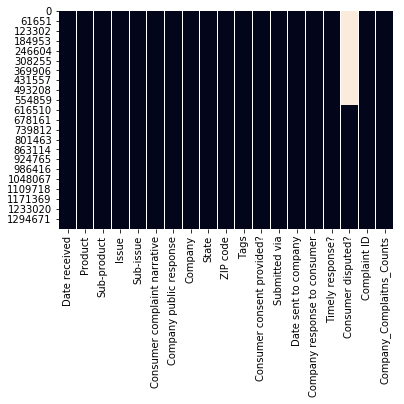

In [349]:
#Correct Consumer Disputed and Check whether there is N/A in the data or not 
df['State'].fillna('Not provided',inplace=True)
df['ZIP code'].fillna('Not Provided',inplace=True)
sns.heatmap(df.isnull(), cbar=False)
#onlu consumer disputed column has NA's 

In [27]:
#other yes and no values will be yes and no boolean variables
#Drop missing values from dependent variable 
import numpy as np

df = df.dropna(axis=0, subset=['Consumer disputed?'])

replace={'Yes':True, 'No':False,'Missing':'Missing'}

df['Consumer disputed?']= df['Consumer disputed?'].apply(lambda x: replace[x])



In [28]:
df.shape
#missing rows in dependent variable Consumer disputed  is deleted 

(768490, 19)

In [29]:
#Timely Response column should be boolean also 
#other yes and no values will be yes and no boolean variables
df['Timely response?'].unique() #array(['Yes', 'No'], dtype=object)

replace={'Yes':True, 'No':False}
df['Timely response?']= df['Timely response?'].apply(lambda x: replace[x])

In [30]:
df['Timely response?'].unique() #array(['Yes', 'No'], dtype=object)

array([ True, False])

In [31]:
#Dependent variable distrubution on the dataset
df['Consumer disputed?'].value_counts()
df['Consumer disputed?'].unique()

array([False,  True])

In [32]:
#create new data frame for modelling 
df_model = DataFrame()
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [33]:
#Create 'consent provided' Boolean feature
replace1={'Consent provided':True, 'Consent not provided':False}
df_model['Consumer consent provided?']= df['Consumer consent provided?'].apply(lambda x: replace1[x])

In [34]:
#Create new feeature as number of complaints by company 
company_complaitns_counts = df['Company'].value_counts()
df_model['company_complaint_counts'] = df['Company'].apply(lambda x: company_complaitns_counts[x])

In [35]:
df.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Company_Complaint_Counts
587820,04/22/2017,Credit card,Not Provided,Other,Not Provided,I received a phone call from a female XXXX s...,Company chooses not to provide,CAPITAL ONE FINANCIAL CORPORATION,NY,100XX,Unknown,Consent provided,Web,04/22/2017,Closed with explanation,True,False,2446506,36530
587821,04/22/2017,Bank account or service,(CD) Certificate of deposit,"Account opening, closing, or management",Not Provided,Bank accounts ( CD & Money Markets ) w as ope...,Company has responded to the consumer and the ...,U.S. BANCORP,IL,60643,Unknown,Consent provided,Web,04/22/2017,Closed with explanation,True,False,2447675,17790
587822,04/22/2017,Credit reporting,Not Provided,Incorrect information on credit report,Account status,At the beginning of XXXX I started receiving...,Company chooses not to provide,ENCORE CAPITAL GROUP INC.,NY,136XX,Unknown,Consent provided,Web,04/25/2017,Closed with explanation,True,False,2447345,11844
587823,04/22/2017,Credit reporting,Not Provided,Incorrect information on credit report,Account status,None or Not Provided,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",IL,607XX,Unknown,Consent not provided,Web,04/22/2017,Closed with non-monetary relief,True,False,2445933,107666
587824,04/22/2017,Bank account or service,Checking account,Using a debit or ATM card,Not Provided,None or Not Provided,Company chooses not to provide,KEYCORP,OH,44136,Servicemember,Consent not provided,Phone,04/25/2017,Closed with explanation,True,False,2447327,3421


In [36]:

feature_for_model=['Product', 'Sub-product','Issue','Sub-issue', 'Company public response','Tags',
                'Company response to consumer', 'State','Timely response?']
for name in feature_for_model:
    repl={}
    i=0
    for value in df[name].unique():
        repl[value] = i
        i+=1
       
    df[name] = df[name].apply(lambda x: repl[x])
    df_model[name] = df[name].astype('category')

In [37]:
#Timely Response column should be boolean also 
#other yes and no values will be yes and no boolean variables
replace={1:True, 0:False}
df_model['Timely response?']= df_model['Timely response?'].apply(lambda x: replace[x])

In [38]:
df_model.head()
df.rename(columns={"company_complaint_counts": "Complaint.count.by.company"})
df_model.rename(columns={"company_complaint_counts": "Complaint.count.by.company"})



,Consumer consent provided?,Complaint.count.by.company,Product,Sub-product,Issue,Sub-issue,Company public response,Tags,Company response to consumer,State,Timely response?
587820,True,20314,0,0,0,0,0,0,0,0,False
587821,True,12347,1,1,1,0,1,0,0,1,False
587822,True,7843,2,0,2,1,0,0,0,0,False
587823,False,40006,2,0,2,1,1,0,1,1,False
587824,False,2098,1,2,3,0,0,1,0,2,False
587825,False,53693,3,3,4,0,1,0,1,3,False
587826,True,20314,0,0,5,0,0,0,0,4,False
587827,False,53693,3,4,6,0,1,2,0,5,False
587828,False,45622,2,0,2,2,1,0,0,5,False
587829,True,18002,4,5,7,3,0,1,0,5,False


In [39]:
## create receive month, year and day 
#Convert date columns to date from strings 
from datetime import datetime

df['Date received']=pd.to_datetime(pd.Series(df['Date received']), format="%m/%d/%Y")

df['Date sent to company']=pd.to_datetime(pd.Series(df['Date sent to company']), format="%m/%d/%Y")


df.head(10)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Company_Complaint_Counts
587820,2017-04-22,0,0,0,0,I received a phone call from a female XXXX s...,0,CAPITAL ONE FINANCIAL CORPORATION,0,100XX,0,Consent provided,Web,2017-04-22,0,0,False,2446506,36530
587821,2017-04-22,1,1,1,0,Bank accounts ( CD & Money Markets ) w as ope...,1,U.S. BANCORP,1,60643,0,Consent provided,Web,2017-04-22,0,0,False,2447675,17790
587822,2017-04-22,2,0,2,1,At the beginning of XXXX I started receiving...,0,ENCORE CAPITAL GROUP INC.,0,136XX,0,Consent provided,Web,2017-04-25,0,0,False,2447345,11844
587823,2017-04-22,2,0,2,1,None or Not Provided,1,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",1,607XX,0,Consent not provided,Web,2017-04-22,1,0,False,2445933,107666
587824,2017-04-22,1,2,3,0,None or Not Provided,0,KEYCORP,2,44136,1,Consent not provided,Phone,2017-04-25,0,0,False,2447327,3421
587825,2017-04-22,3,3,4,0,None or Not Provided,1,WELLS FARGO & COMPANY,3,852XX,0,Consent not provided,Web,2017-04-22,1,0,False,2447264,73092
587826,2017-04-22,0,0,5,0,I have dispute d my Capital One ac count many ...,0,CAPITAL ONE FINANCIAL CORPORATION,4,302XX,0,Consent provided,Web,2017-04-22,0,0,False,2446771,36530
587827,2017-04-22,3,4,6,0,None or Not Provided,1,WELLS FARGO & COMPANY,5,933XX,2,Consent not provided,Web,2017-04-22,0,0,False,2447032,73092
587828,2017-04-22,2,0,2,2,None or Not Provided,1,Experian Information Solutions Inc.,5,925XX,0,Consent not provided,Web,2017-04-22,0,0,False,2446477,112756
587829,2017-04-21,4,5,7,3,I was notifie d two years later of missed pa...,0,"Navient Solutions, LLC.",5,959XX,1,Consent provided,Web,2017-04-21,0,0,False,2446721,30213


In [40]:
print (df.dtypes)


Date received                   datetime64[ns]
Product                                  int64
Sub-product                              int64
Issue                                    int64
Sub-issue                                int64
Consumer complaint narrative            object
Company public response                  int64
Company                                 object
State                                    int64
ZIP code                                object
Tags                                     int64
Consumer consent provided?              object
Submitted via                           object
Date sent to company            datetime64[ns]
Company response to consumer             int64
Timely response?                         int64
Consumer disputed?                        bool
Complaint ID                             int64
Company_Complaint_Counts                 int64
dtype: object


In [41]:
##Create features about complaint submitted time

df_model['Received_year'] = df['Date received'].apply(lambda x: x.year)
df_model['Received_month'] = df['Date received'].apply(lambda x: x.month)
df_model['Received_day'] = df['Date received'].apply(lambda x: x.day)

# Check new data frame  for model 

In [42]:
print(df_model.dtypes)
df_model.head().T

Consumer consent provided?          bool
company_complaint_counts           int64
Product                         category
Sub-product                     category
Issue                           category
Sub-issue                       category
Company public response         category
Tags                            category
Company response to consumer    category
State                           category
Timely response?                category
Received_year                      int64
Received_month                     int64
Received_day                       int64
dtype: object


,587820,587821,587822,587823,587824
Consumer consent provided?,True,True,True,False,False
company_complaint_counts,20314,12347,7843,40006,2098
Product,0,1,2,2,1
Sub-product,0,1,0,0,2
Issue,0,1,2,2,3
Sub-issue,0,0,1,1,0
Company public response,0,1,0,1,0
Tags,0,0,0,0,1
Company response to consumer,0,0,0,1,0
State,0,1,0,1,2


# MODELS 

In [ ]:
#Train, test, split

In [373]:
df.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID,Company_Complaitns_Counts
587820,2017-04-22,0,0,0,0,I received a phone call from a female XXXX s...,0,CAPITAL ONE FINANCIAL CORPORATION,0,100XX,0,Consent provided,Web,2017-04-22,0,0,False,2446506,36530
587821,2017-04-22,1,1,1,0,Bank accounts ( CD & Money Markets ) w as ope...,1,U.S. BANCORP,1,60643,0,Consent provided,Web,2017-04-22,0,0,False,2447675,17790


In [43]:
df['Consumer disputed?'].value_counts()

False    620112
True     148378
Name: Consumer disputed?, dtype: int64

In [44]:

X = df_model.values
y = df['Consumer disputed?'].values

#Model dataframe will only look for nonmissing values fro Consumer Disputed
#df = df[df['Consumer disputed?'] != "Missing"]



In [45]:
X.shape
y.shape




(768490,)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=67)

In [47]:
#do standart scales 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


###  Logistic Regression 

In [92]:
lr = LogisticRegression(class_weight='balanced')
lr.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)

In [93]:
#accuracy score 
lr.score(X_test,y_test)

0.5248474280732345

In [94]:
#predcition based on logictic regression 
v_probs = lr.predict_proba(X_test)[:, 1]

In [95]:
def roc_curve(probabilities, labels):
    '''
    INPUT: numpy array, numpy array
    OUTPUT: list, list, list

    Take a numpy array of the predicted probabilities and a numpy array of the
    true labels.
    Return the True Positive Rates, False Positive Rates and Thresholds for the
    ROC curve.
    '''

    thresholds = np.sort(probabilities)

    tprs = []
    fprs = []

    num_positive_cases = sum(labels)
    num_negative_cases = len(labels) - num_positive_cases

    for threshold in thresholds:
        # With this threshold, give the prediction of each instance
        predicted_positive = probabilities >= threshold
        # Calculate the number of correctly predicted positive cases
        true_positives = np.sum(predicted_positive * labels)
        # Calculate the number of incorrectly predicted positive cases
        false_positives = np.sum(predicted_positive) - true_positives
        # Calculate the True Positive Rate
        tpr = true_positives / float(num_positive_cases)
        # Calculate the False Positive Rate
        fpr = false_positives / float(num_negative_cases)

        fprs.append(fpr)
        tprs.append(tpr)
    
    return tprs, fprs, thresholds.tolist()

def plot_roc(v_probs, y_test, title, xlabel, ylabel):
    # ROC
    fig = plt.figure(figsize = (8,6))
    tpr, fpr, thresholds = roc_curve(v_probs, y_test)
    
    import sklearn.metrics as skm
    auc = skm.roc_auc_score(y_test, v_probs)

    plt.hold(True)
    plt.plot(fpr, tpr)

    # 45 degree line
    xx = np.linspace(0, 1.0, 20)
    plt.plot(xx, xx, 'k--')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    fig.savefig(title+'.png')

In [96]:
#look Area Under Curve Score
import sklearn.metrics as skm
skm.roc_auc_score(y_test, v_probs)

0.568850431521365

In [ ]:
#Consufion Matrix of Linear Regression Model

In [97]:
pd.crosstab(y_test, lr.predict(X_test))

col_0,False,True
row_0,,
False,63336,60776
True,12254,17332


In [98]:


def plot_confusion_matrix(model, X_test, y_true):
    cm = confusion_matrix(y_true, model.predict(X_test))

    print(cm)

    # Show confusion matrix in a separate window
    plt.matshow(cm)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

[[63336 60776]
 [12254 17332]]


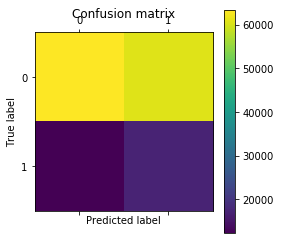

In [99]:
plot_confusion_matrix(lr, X_test, y_test)

# Random Forest Claasifier Without Grid Search

In [101]:
## Random Forest Classifier
##A random forest classifier. A random forest is a meta estimator that fits a number of decision tree classifiers 
##on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.
rfc = RandomForestClassifier(n_estimators=50, n_jobs=-1, class_weight='balanced', max_features=1)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=50, n_jobs=-1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [102]:
rfc.score(X_test, y_test)

0.7973623599526344

In [103]:
pd.crosstab(y_test, rfc.predict(X_test))

col_0,False,True
row_0,,
False,120752,3360
True,27785,1801


In [396]:
skm.roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])

0.6100128915491172

[[120752   3360]
 [ 27785   1801]]


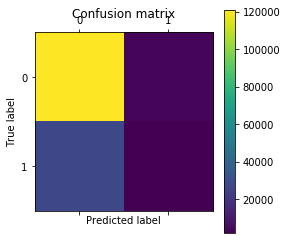

In [104]:
plot_confusion_matrix(rfc, X_test, y_test)

In [107]:
def plot_importance(clf, X, max_features=10):
    '''Plot feature importance'''
    feature_importance = clf.feature_importances_
    # make importances relative to max importance
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    pos = np.arange(sorted_idx.shape[0]) + .5
    
    # Show only top features
    pos = pos[-max_features:]
    feature_importance = (feature_importance[sorted_idx])[-max_features:]
    feature_names = (X.columns[sorted_idx])[-max_features:]
    
    plt.barh(pos, feature_importance, align='center')
    plt.yticks(pos, feature_names)
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')

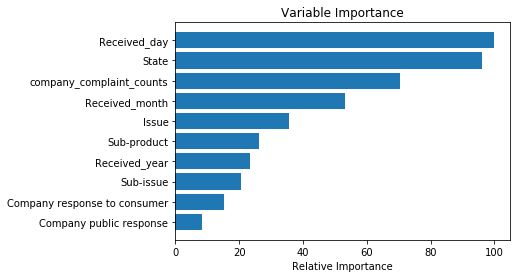

In [400]:
plot_importance(rfc, df_model, max_features=10)

# Random Forest Classifier With Grid Search and CV

In [72]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer
import numpy as np

In [ ]:
#Random Forest with CV 

In [161]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=300, random_state=0)

In [162]:
from sklearn.model_selection import cross_val_score
all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)


In [163]:
print(all_accuracies)

[0.79833115 0.79753414 0.79815872 0.79862229 0.79806113]


In [ ]:
for (train, test), i in zip(cv.split(X, y), range(5)):
    clf.fit(X.iloc[X_train], y.iloc[y_train])
    _, _, auc_score_train = compute_roc_auc(train)
    fpr, tpr, auc_score = compute_roc_auc(test)
    scores.append((auc_score_train, auc_score))
    fprs.append(fpr)
    tprs.append(tpr)

plot_roc_curve(fprs, tprs);
pd.DataFrame(scores, columns=['AUC Train', 'AUC Test'])

In [191]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')

In [ ]:
print rfc_cv_score

In [195]:
rfc_predict=rfc.predict(X_test)

In [197]:
#Print Random Forest with CV Results
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())

=== Confusion Matrix ===
[[118852   5260]
 [ 27031   2555]]


=== Classification Report ===
              precision    recall  f1-score   support

       False       0.81      0.96      0.88    124112
        True       0.33      0.09      0.14     29586

   micro avg       0.79      0.79      0.79    153698
   macro avg       0.57      0.52      0.51    153698
weighted avg       0.72      0.79      0.74    153698



=== All AUC Scores ===
[0.42664244 0.25341518 0.22237417 0.23312162 0.20911853 0.28106373
 0.2870913  0.27479898 0.34544912 0.48985554]


=== Mean AUC Score ===
Mean AUC Score - Random Forest:  0.3022930610479056


### Random Forest with Grid Search 

In [202]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# number of features at every split
max_features = ['auto', 'sqrt']

# max depth
max_depth = [int(x) for x in np.linspace(100, 500, num = 11)]
max_depth.append(None)
# create random grid
random_grid = {
 'n_estimators': n_estimators,
 'max_features': max_features,
 'max_depth': max_depth
 }
# Random search of parameters
rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the model
rfc_random.fit(X_train, y_train)
# print results
print(rfc_random.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


MemoryError: could not allocate 14680064 bytes

In [ ]:
rfc = RandomForestClassifier(n_estimators=600, max_depth=300, max_features='sqrt')
rfc.fit(X_train,y_train)
rfc_predict = rfc.predict(X_test)
rfc_cv_score = cross_val_score(rfc, X, y, cv=10, scoring='roc_auc')
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')
print("=== All AUC Scores ===")
print(rfc_cv_score)
print('\n')
print("=== Mean AUC Score ===")
print("Mean AUC Score - Random Forest: ", rfc_cv_score.mean())